# Autoencoder

## O que é?

O Autoencoder é usado para aprender incorporações eficientes de dados não rotulados (aprendizado não-supervisionado) para uma determinada configuração de rede.  

O autoencoder consiste em duas partes, um `codificador` e um `decodificador`.  

O codificador comprime os dados de um espaço de dimensão superior para um espaço de dimensão inferior (também chamado de espaço latente), enquanto o decodificador faz o oposto, ou seja, converte o espaço latente de volta em um espaço de dimensão superior.  

O decodificador é usado para garantir que o espaço latente possa capturar a maior parte das informações do espaço do conjunto de dados, forçando-o a produzir o que foi alimentado como entrada para o decodificador.

![1](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*qFzKC1GqOR17XaiQBex83w.png)

## Treinamento:

Durante o treinamento, os dados de entrada X são alimentados na função do codificador **e_theta(x)**.

A entrada passa por uma série de camadas reduzindo suas dimensões para atingir um vetor latente comprimido z.
O número de camadas, tipo e tamanho das camadas e a dimensão do espaço latente são parâmetros controlados pelo arquiteto da rede.

A compressão é alcançada se a dimensão do espaço latente for menor que a do espaço de entrada, **essencialmente eliminando atributos redundantes**.

O decodificador **d_phi(z)** geralmente (mas não necessariamente) consiste em camadas quase complementares das camadas usadas no codificador, mas em ordem inversa.  

Uma camada quase complementar de uma camada é aquela que pode ser usada para desfazer as operações (até certo ponto) da camada original, como camada convolução transposta para camada convolução, pooling para unpooling, etc.

## Função de perda (Loss Function)

Toda a arquitetura do codificador-decodificador é treinada coletivamente em uma função de perda, o que permite que a entrada seja reconstruída na saída.  Portanto, a função de perda é o erro quadrático médio entre a entrada do codificador e a saída do decodificador.

A ideia é ter um espaço latente de dimensão muito baixa para que a compressão máxima seja alcançada, mas ao mesmo tempo o erro seja pequeno o suficiente.  A redução da dimensão do espaço latente além de um determinado valor resultará em uma perda significativa de informação.


### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist


### Dataset

Conjunto de dados contém imagens em escala de cinza de 28x28 pixels de itens de moda, como roupas e acessórios.

É dividido em conjuntos de treinamento (x_train) e teste (x_test), mas neste código, o conjunto de destino (_) não é usado.

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Normalizar e Redimensionar os Dados

Normalizar os dados dividindo todos os valores de pixel por 255 para escalá-los para o intervalo [0, 1]. Além disso, é feito redimensionamento das imagens de 28x28 pixels para vetores unidimensionais de 784 elementos para facilitar o processamento.

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


### Tamanho da Camada Latente e Definição do Autoencoder

Nesta célula, é definido o tamanho da camada latente como 32. Em seguida, cria-se um modelo de autoencoder, que consiste em uma camada de entrada (input_img), uma camada codificada (encoded) com ativação ReLU e uma camada decodificada (decoded) com ativação sigmoid.

Lembrabdi que o autoencoder é um modelo de rede neural que tenta aprender uma representação compacta de entrada, que é útil para tarefas de reconstrução

In [11]:
latent_dim = 32


input_img = Input(shape=(784,))
encoded = Dense(latent_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


### Compilar o Modelo e treinar



In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.4122 - val_loss: 0.3407
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3267 - val_loss: 0.3197
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3120 - val_loss: 0.3093
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3033 - val_loss: 0.3018
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2965 - val_loss: 0.2959
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2920 - val_loss: 0.2926
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2893 - val_loss: 0.2905
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2877 - val_loss: 0.2891
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2866 - val_loss: 0.2882
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2858 - val_lo

### Codificar e Decodificar Imagens de Teste

In [6]:
decoded_imgs = autoencoder.predict(x_test)


313/313 [==============================] - 1s 2ms/step


###  Exibir Algumas Imagens Originais e Reconstruídas

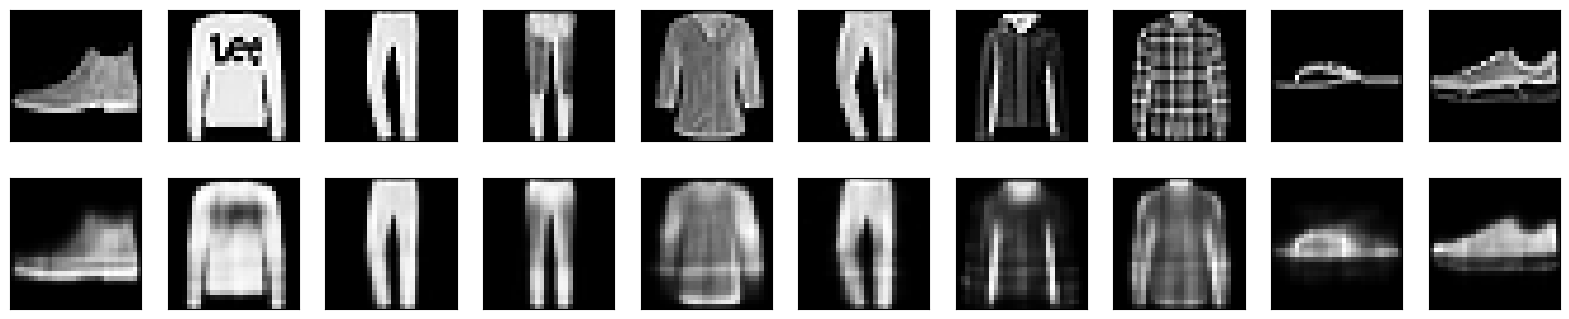

In [7]:
n = 10  # número de imagens para exibir
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
